In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import pyabf 
import seaborn as sns
import os
from scipy import stats



In [2]:
sEPSC_ntsr1_freq = {
        'Cell_ID': ['M1_C1', 'M1_C2', 'M1_C3', 'M2_C1', 'M2_C2', 'M2_C3', 'M6_C1', 'M6_C2', 'M6_C3'],
        'Animal': ['M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M6', 'M6', 'M6'],
        'Baseline_Frequency': [1.8677, 0.575, 1.0208, 0.5641, 1.2033, 0.9186, 3.4255, 1.7464, 1.0217],
        'NA_Frequency': [0.9283, 0.1662, 0.9855, 0.3319, 1.3427, 0.3547, 0.3552, 0.5639, 0.4719]
    }
    
sEPSC_ntsr1_ampl = {
        'Cell_ID': ['M1_C1', 'M1_C2', 'M1_C3', 'M2_C1', 'M2_C2', 'M2_C3', 'M6_C1', 'M6_C2', 'M6_C3'],
        'Animal': ['M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M6', 'M6', 'M6'],
        'Baseline_Amplitude': [7.5706, 6.7139, 6.1536, 5.188, 6.499, 4.9682, 7.8805, 6.1763, 4.6996],
        'NA_Amplitude': [7.8184, 7.0626, 6.8185, 5.2362, 5.7827 , 5.7086, 5.3993, 5.5099, 6.0505]
    }

sIPSC_ntsr1_freq = {
        'Cell_ID': ['M3_C1', 'M3_C2', 'M3_C3', 'M4_C1', 'M4_C2', 'M4_C3', 'M5_C1', 'M5_C2', 'M5_C3'],
        'Animal': ['M3', 'M3', 'M3', 'M4', 'M4', 'M4', 'M5', 'M5', 'M5'],
        'Baseline_Frequency': [1.1462, 0.563, 2.7665, 2.1435,0.3021,0.7454,0.8081,3.221020878,2.7158],
        'NA_Frequency': [13.281,5.2162,5.0844,2.5665,2.378,8.9352,2.4505,14.592,6.5217]
    }

sIPSC_ntsr1_ampl = {
        'Cell_ID': ['M3_C1', 'M3_C2', 'M3_C3', 'M4_C1', 'M4_C2', 'M4_C3', 'M5_C1', 'M5_C2', 'M5_C3'],
        'Animal': ['M3', 'M3', 'M3', 'M4', 'M4', 'M4', 'M5', 'M5', 'M5'],
        'Baseline_Amplitude': [10.198,6.7138,7.0191,7.4348,5.0756,12.802,5.9815,7.559096154,9.455],
        'NA_Amplitude': [7.8551,6.8923,8.0405,6.6456,8.4617,11.353,6.3087,13.425,7.3418]
    }


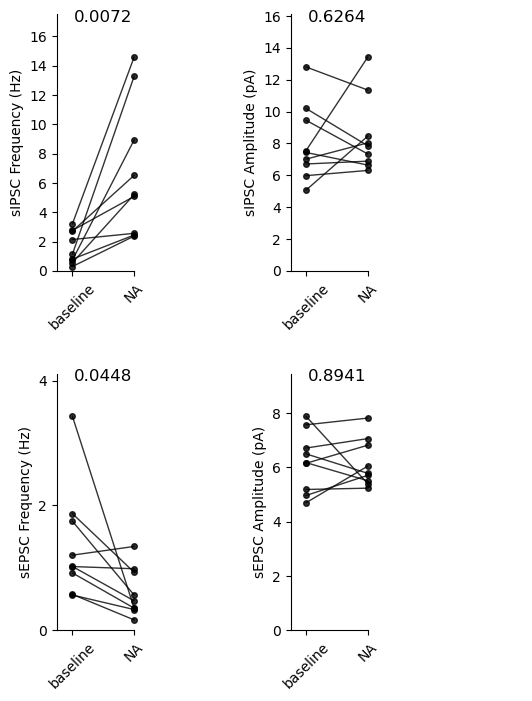

In [25]:

def plot_epsc_ipsc():
    # Create DataFrames
    df_sEPSC_freq = pd.DataFrame(sEPSC_ntsr1_freq)
    df_sEPSC_ampl = pd.DataFrame(sEPSC_ntsr1_ampl)
    df_sIPSC_freq = pd.DataFrame(sIPSC_ntsr1_freq)
    df_sIPSC_ampl = pd.DataFrame(sIPSC_ntsr1_ampl)
    
    # Create 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(6, 8))
    plt.subplots_adjust(wspace=0.01, hspace=0.4)
    
    datasets = [
        (df_sIPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sIPSC Frequency (Hz)', axes[0,0]),
        (df_sIPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sIPSC Amplitude (pA)', axes[0,1]),
        (df_sEPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sEPSC Frequency (Hz)', axes[1,0]),
        (df_sEPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sEPSC Amplitude (pA)', axes[1,1])
    ]
    
    for df, baseline_col, na_col, ylabel, ax in datasets:
        # Plot connected dots
        for _, row in df.iterrows():
            ax.plot([0, 1], [row[baseline_col], row[na_col]], 
                   'o-', color='black', markersize=4, linewidth=1, alpha=0.8)
        
        # Calculate and display p-value
        t_stat, p_val = stats.ttest_rel(df[baseline_col], df[na_col])
        max_y = max(df[baseline_col].max(), df[na_col].max())
        ax.text(0.5, max_y + (max_y * 0.15), f'{p_val:.4f}', 
                ha='center', va='bottom', fontsize=12)
        
        # Format axes
        ax.set_ylabel(ylabel)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['baseline', 'NA'], rotation=45)
        
        # Set tight x-axis limits that match the data points
        ax.set_xlim(-0.25, 3.5)
        
        # Set y-axis limit with space for p-value
        ax.set_ylim(0, max_y + (max_y * 0.2))

        # Set y-axis ticks every 5 units
        ax.yaxis.set_major_locator(MultipleLocator(2))
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adjust spine lengths to match x-axis limits
        ax.spines['bottom'].set_bounds(-0.25, 1)
        ax.spines['left'].set_bounds(0, ax.get_ylim()[1])
    
    plt.show()

# Run the function
plot_epsc_ipsc()